In [1307]:
import pandas as pd

In [1308]:
pd.set_option('display.max_columns',None) # display all columns

df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [1309]:
df[['customerID','tenure','Churn']]

,customerID,tenure,Churn
0,7590-VHVEG,1,No
1,5575-GNVDE,34,No
2,3668-QPYBK,2,Yes
3,7795-CFOCW,45,No
4,9237-HQITU,2,Yes
...,...,...,...
7038,6840-RESVB,24,No
7039,2234-XADUH,72,No
7040,4801-JZAZL,11,No
7041,8361-LTMKD,4,Yes


At a first glance, a low tenure value doesn't necessarly mean that the customer churned.

#### Checking the uniquness of customerID

In [1310]:
df['customerID'].value_counts()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

The number of unique values of customerID is 7043 which is equal to the number of rows in the data set. Hence this variable is unique.

### Tenure vs Types of Contract

In [1321]:
df_tenure_intervals =  pd.cut(df['tenure'],bins=30)
df_tenure_agg = df.groupby(df_tenure_intervals)[['Contract','Churn']].value_counts().to_frame(name='ContractCount')
df_tenure_agg

ContractCount
tenure        Contract       Churn               
(-0.072, 2.4] Month-to-month Yes              501
                             No               333
              Two year       No                13
              One year       No                13
                             Yes                2
...                                           ...
(69.6, 72.0]  One year       No                65
              Two year       Yes               14
              Month-to-month No                 9
              One year       Yes                7
              Month-to-month Yes                2

[180 rows x 1 columns]

In [1319]:
pivot_table = df_tenure_agg.pivot_table(index = 'tenure',columns=['Contract','Churn'],values=['ContractCount'])
pivot_table.reset_index(inplace=True)
pivot_table.head()


tenure  ContractCount                               
Contract                Month-to-month      One year     Two year    
Churn                               No  Yes       No Yes       No Yes
0         (-0.072, 2.4]            333  501       13   2       13   0
1            (2.4, 4.8]            180  176       12   1        7   0
2            (4.8, 7.2]            183  153       23   2       13   0
3            (7.2, 9.6]            120   86       18   2       16   0
4           (9.6, 12.0]            154  108       45   6       19   0

In [1313]:
pivot_table['TenureMidRange'] = pivot_table['tenure'].apply(lambda row: round((row.left + row.right)/2))
pivot_table

tenure  ContractCount                                 \
Contract                Month-to-month      One year     Two year       
Churn                               No  Yes       No Yes       No Yes   
0         (-0.072, 2.4]            333  501       13   2       13   0   
1            (2.4, 4.8]            180  176       12   1        7   0   
2            (4.8, 7.2]            183  153       23   2       13   0   
3            (7.2, 9.6]            120   86       18   2       16   0   
4           (9.6, 12.0]            154  108       45   6       19   0   
5          (12.0, 14.4]             79   60       26   2       18   0   
6          (14.4, 16.8]             80   65       22   0       12   0   
7          (16.8, 19.2]            124   62       46   7       18   0   
8          (19.2, 21.6]             65   33       24   2       10   0   
9          (21.6, 24.0]            111   58       63   5       32   0   
10         (24.0, 26.4]             65   33       43   4       12   1   
11         (26.4, 28.8]             52   23       40   2       12   0   
12         (28.8, 31.2]             87   44       51   3       24   0   
13         (31.2, 33.6]             51   26       36   6       13   1   
14         (33.6, 36.0]             73   32       60   5       33   0   
15         (36.0, 38.4]             39   23       35   5       22   0   
16         (38.4, 40.8]             35   20       37   6       21   1   
17         (40.8, 43.2]             56   33       63   9       38   1   
18         (43.2, 45.6]             35    7       38   5       27   0   
19         (45.6, 48.0]             45   23       60  10       66   2   
20         (48.0, 50.4]             30   18       48   5       31   2   
21         (50.4, 52.8]             31   11       58   4       43   1   
22         (52.8, 55.2]             40   17       65  16       61   3   
23         (55.2, 57.6]             31    8       46   7       50   3   
24         (57.6, 60.0]             37   11       60  12       81   2   
25         (60.0, 62.4]             19    4       50   6       64   3   
26         (62.4, 64.8]             21    2       46   4       77   2   
27         (64.8, 67.2]             25   10       73  14      133   8   
28         (67.2, 69.6]             10    6       41   7      127   4   
29         (69.6, 72.0]              9    2       65   7      554  14   

         TenureMidRange  
Contract                 
Churn                    
0                     1  
1                     4  
2                     6  
3                     8  
4                    11  
5                    13  
6                    16  
7                    18  
8                    20  
9                    23  
10                   25  
11                   28  
12                   30  
13                   32  
14                   35  
15                   37  
16                   40  
17                   42  
18                   44  
19                   47  
20                   49  
21                   52  
22                   54  
23                   56  
24                   59  
25                   61  
26                   64  
27                   66  
28                   68  
29                   71

C:\Users\user\AppData\Local\Temp\ipykernel_22192\2945039146.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','Month-to-month'),title="Relationship between the number of customers who commits to a monthly based contract and the number of months they stay with the company")


Text(0, 0.5, 'Number of customers')

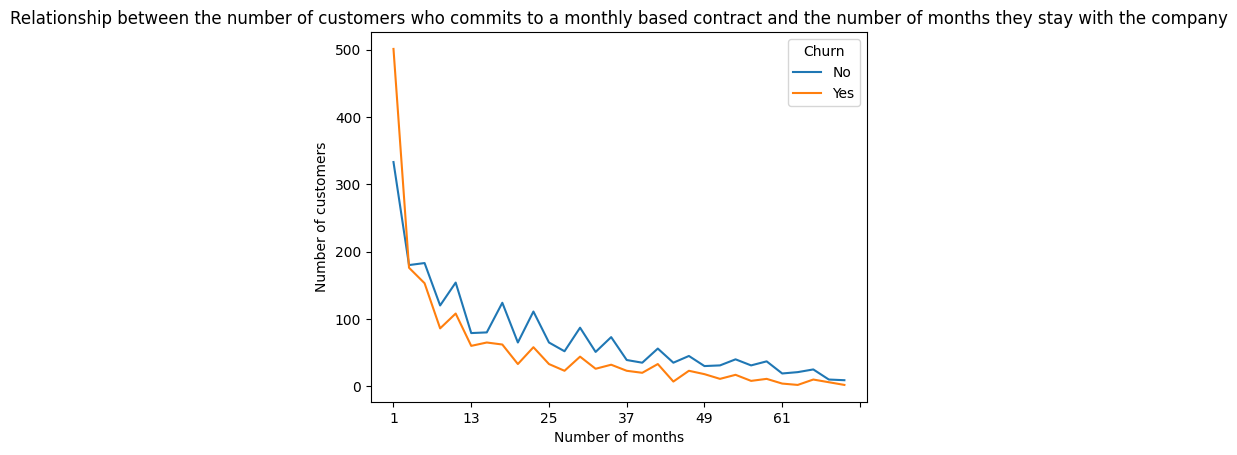

In [1314]:
from matplotlib import pyplot
pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','Month-to-month'),title="Relationship between the number of customers who commits to a monthly based contract and the number of months they stay with the company")

pyplot.xlabel('Number of months')
pyplot.ylabel('Number of customers')

The majority of the customers who signs contract on a monthly basis last for only 1-5 months, the longer the customer stay with the company the lower would be the number of those contracts.  
On a monthly level, the number of customers who churned is somewhat close to the number of customers who didn't.

C:\Users\user\AppData\Local\Temp\ipykernel_22192\2180133555.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','One year'),title="Relationship between the number of customers who commit to a yearly-based contract and the number of months they stay with the company")


Text(0, 0.5, 'Number of customers')

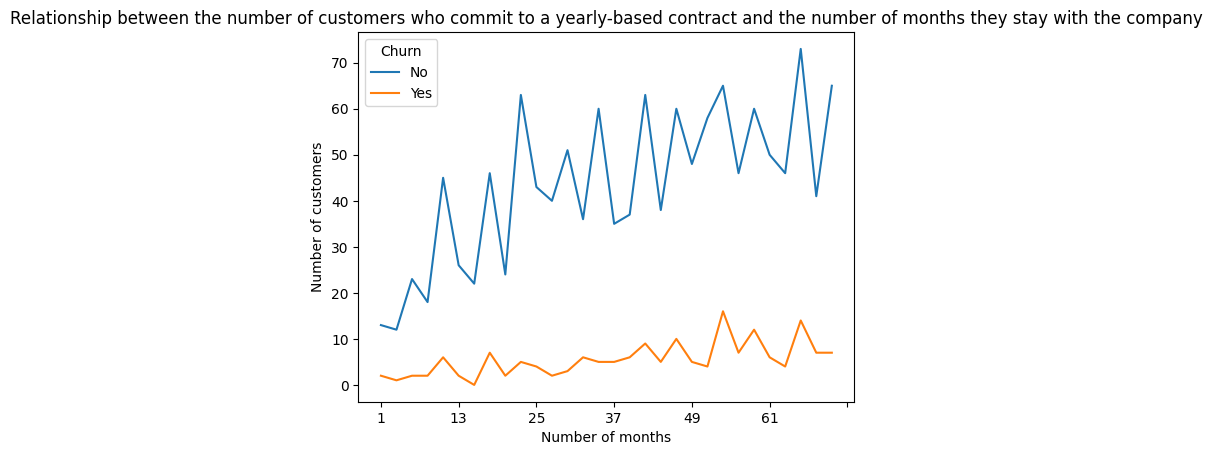

In [1315]:
pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','One year'),title="Relationship between the number of customers who commit to a yearly-based contract and the number of months they stay with the company")
pyplot.xlabel('Number of months')
pyplot.ylabel('Number of customers')

Rarely are the customers who signs a contract for 1 year then terminate it in the first months.  
Data set shows a peak in the number of customers every year (12 months). This is due to the nature of the contract, these types of people tend to commit on a yearly basis.  
On a monthly level, the number of customers who churned is much lower than the number of customers who didn't

C:\Users\user\AppData\Local\Temp\ipykernel_22192\636547481.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','Two year'),title="Relationship between the number of customers who commits to a two year based contract and the number of months they stay with the company")


Text(0, 0.5, 'Number of customers')

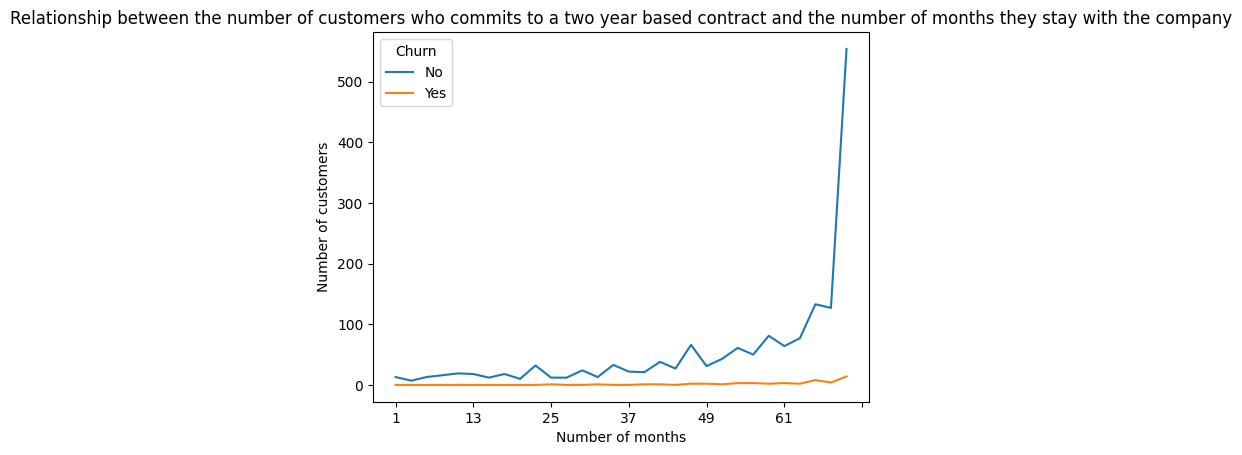

In [1316]:
pivot_table.plot.line(x='TenureMidRange',y=('ContractCount','Two year'),title="Relationship between the number of customers who commits to a two year based contract and the number of months they stay with the company")
pyplot.xlabel('Number of months')
pyplot.ylabel('Number of customers')

People who sign a contract on a two-yearly basis tend to last the longest.  
Due to the nature of the contract, the dataset shows a minor peak in the number of customers every two years (24 months), although it's not as prominent as the peaks shown in the yearly-based chart.

We can conclude from these charts that the longer the duration of the contract, the more committed people tend to be.
Customers tend to churn more when the contract is on a monthly basis.

In [1317]:
df_ = df[['Contract', 'InternetService', 'SeniorCitizen','tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'MonthlyCharges']].copy()

In [1318]:
def count_yes(series):
    return series.value_counts().get('Yes', '0')


def count_no(series):
    return series.value_counts().get('No', '0')


def count_senior(series):
    return series.value_counts().get(1, 'NaN')


df_['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df_contract_agg = df_.groupby(['Contract', 'InternetService']).agg({
                                                                    'Churn': [('Yes', count_yes), ('No', count_no)],
                                                                    'SeniorCitizen': [('count',count_senior)],
                                                                    'PhoneService': [('Yes', count_yes), ('No', count_no)],
                                                                    'OnlineSecurity': [('Yes', count_yes), ('No', count_no)],
                                                                    'OnlineBackup': [('Yes', count_yes), ('No', count_no)],
                                                                    'DeviceProtection': [('Yes', count_yes), ('No', count_no)],
                                                                    'TechSupport': [('Yes', count_yes), ('No', count_no)],
                                                                    'StreamingTV': [('Yes', count_yes), ('No', count_no)],
                                                                    'StreamingMovies': [('Yes', count_yes), ('No', count_no)],
                                                                    'MonthlyCharges': [('average', 'mean')]
                                                                }
                                                                ).round(1)

df_contract_agg


Churn      SeniorCitizen PhoneService       \
                                 Yes   No         count          Yes   No   
Contract       InternetService                                              
Month-to-month DSL               394  829           159          847  376   
               Fiber optic      1162  966           636         2128    0   
               No                 99  425            12          524    0   
One year       DSL                53  517            50          425  145   
               Fiber optic       104  435           124          539    0   
               No                  9  355            16          364    0   
Two year       DSL                12  616            50          467  161   
               Fiber optic        31  398            71          429    0   
               No                  5  633            24          638    0   

                               OnlineSecurity       OnlineBackup        \
                                          Yes    No          Yes    No   
Contract       InternetService                                           
Month-to-month DSL                        366   857          371   852   
               Fiber optic                354  1774          692  1436   
               No                           0     0            0     0   
One year       DSL                        330   240          279   291   
               Fiber optic                222   317          343   196   
               No                           0     0            0     0   
Two year       DSL                        484   144          436   192   
               Fiber optic                263   166          308   121   
               No                           0     0            0     0   

                               DeviceProtection       TechSupport        \
                                            Yes    No         Yes    No   
Contract       InternetService                                            
Month-to-month DSL                          280   943         339   884   
               Fiber optic                  677  1451         332  1796   
               No                             0     0           0     0   
One year       DSL                          306   264         326   244   
               Fiber optic                  340   199         226   313   
               No                             0     0           0     0   
Two year       DSL                          479   149         513   115   
               Fiber optic                  340    89         308   121   
               No                             0     0           0     0   

                               StreamingTV       StreamingMovies        \
                                       Yes    No             Yes    No   
Contract       InternetService                                           
Month-to-month DSL                     298   925             307   916   
               Fiber optic            1000  1128             997  1131   
               No                        0     0               0     0   
One year       DSL                     255   315             259   311   
               Fiber optic             397   142             403   136   
               No                        0     0               0     0   
Two year       DSL                     404   224             415   213   
               Fiber optic             353    76             351    78   
               No                        0     0               0     0   

                               MonthlyCharges  
                                      average  
Contract       InternetService                 
Month-to-month DSL                       50.2  
               Fiber optic               87.0  
               No                        20.4  
One year       DSL                       61.4  
               Fiber optic               98.8  
               No                        20

The above data frame shows, for each internet service, the number of customers subscribed and unsubscribed to that service, grouped by the type of contract and the type of internet service. It also displays additional information, such as the number of senior citizens in each category and the monthly charge.  

What all contract types have in common is the fact that customers with no internet service stay with the company only for the PhoneService, this is reflected by the low number of churned customers for each contract type where there is no internet Service. Also, the monthly charge of the phoneService is the same for the three contracts.

SeniorCitizen having Fiber optic as an internet service provider are more numerous than the ones subscribed to DSL or with no internet service. Due to the complexity of fiber optic installation, senior citizen are more likely to have them installed. But when it comes to comparing the number of SeniorCitizen for each Contract, the ones with the monthly based contract are more numerous than the seniors of the two others contract. And this raise two questions:  

1- Why would a senior citizen who's obviously settled and feel comfortable in the city subscribe to a monthly based contract?  
2- Why on the month-to-month contract level, the fiber optic is the most service that is exposed to customers churn and most of the senior citizen are falling into this category ?  

Senior citizens are considered an important demographic in market analysis, due to their long-term perspective. They lived in the area for a longer time, giving them a historical perspective on local trends, changes, and developments. Hence in our case, they were able to find better services with better prices. 

With that being said, the service over price ratio (aka value proposition) is most probably the main factor why customers would churn. As solution, in order to improve the ratio, I would propose enhancing the performance of the internet services and increasing the bundling services in order to acheive a better price.